# Sieci neuronowe i Deep Learning
# Temat 5: Moduł torch.nn w bibliotece PyTorch

## Zadanie 5.1

Wykorzystując moduł `torch.nn`, zbudować sieć MLP dla zadania
klasyfikacji odręcznie pisanych cyfr na podstawie zbioru danych MNIST, rozważanego w ramach zajęć nr 3 (patrz notebook do tematu nr 3).

- W pierwszej kolejności odtworzyć sieć implementowaną od podstaw jako przykład w ramach zajęć nr 3 i porównać otrzymane wyniki.

- Następnie rozważyć różne modyfikacje tej sieci z wykorzystaniem możliwości, które daje moduł `torch.nn` (rozważyć inną liczbę i budowę warstw ukrytych, przetestować różne funkcje aktywacji oraz inne algorytmy optymalizacyjne z modułu `torch.optim`). Porównać otrzymane wyniki.

Wszystkie sieci w ramach tego zadania skonstruować na podstawie tych samych danych uczących, walidacyjnych i testowych – utworzonych w analogiczny sposób jak w notebooku z wykładu 3.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils

In [2]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Test the model and visualize some predictions
def test_and_visualize(model, test_loader, classes, dataset = "MNIST" or 'CIFAR'):
    model.eval()  # Set the model to evaluation mode
    data_iter = iter(test_loader)
    images, labels = next(data_iter)

    # Display images
    imshow(torchvision.utils.make_grid(images[:20], nrow=5, padding=2))
    plt.axis('off')
    print('GroundTruth:', ' '.join(f'{classes[labels[j]]}' for j in range(20)))

    # Predict
    if dataset == "MNIST":
        images = images.view(-1, 28 * 28)
    elif dataset == "CIFAR":    
        images = images.view(-1, 32 * 32 * 3)
    else:
        raise ValueError("Unsupported dataset. Use 'MNIST' or 'CIFAR'.")    
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    print('Predicted:', ' '.join(f'{classes[predicted[j]]}' for j in range(20)))

Epoch 1/100, Loss: 0.09576563119888305, Accuracy: 18.20%
Epoch 2/100, Loss: 0.08516461692750454, Accuracy: 33.86%
Epoch 3/100, Loss: 0.08221448197960854, Accuracy: 44.51%
Epoch 4/100, Loss: 0.07954196646809578, Accuracy: 51.58%
Epoch 5/100, Loss: 0.07711214989423752, Accuracy: 56.87%
Epoch 6/100, Loss: 0.07489466525614262, Accuracy: 60.52%
Epoch 7/100, Loss: 0.0728646407276392, Accuracy: 63.16%
Epoch 8/100, Loss: 0.07100537858903408, Accuracy: 65.24%
Epoch 9/100, Loss: 0.0692985949665308, Accuracy: 66.83%
Epoch 10/100, Loss: 0.06772895976901054, Accuracy: 68.22%
Epoch 11/100, Loss: 0.06628474973142147, Accuracy: 69.31%
Epoch 12/100, Loss: 0.06495245594531297, Accuracy: 70.25%
Epoch 13/100, Loss: 0.0637264672294259, Accuracy: 71.01%
Epoch 14/100, Loss: 0.06259340159595013, Accuracy: 71.81%
Epoch 15/100, Loss: 0.061548658944666386, Accuracy: 72.44%
Epoch 16/100, Loss: 0.06058078430593014, Accuracy: 73.03%
Epoch 17/100, Loss: 0.059681570008397106, Accuracy: 73.64%
Epoch 18/100, Loss: 0.05

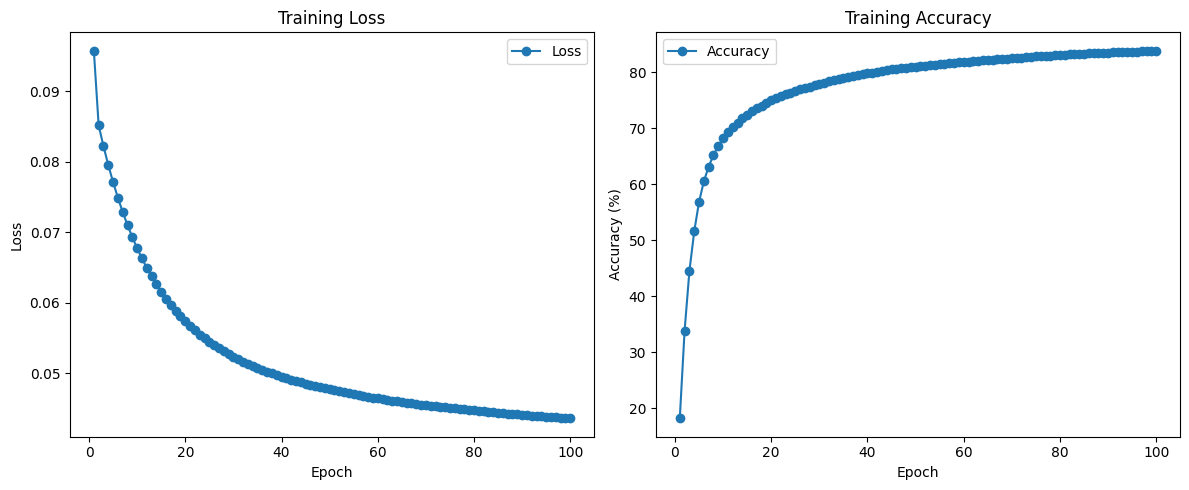

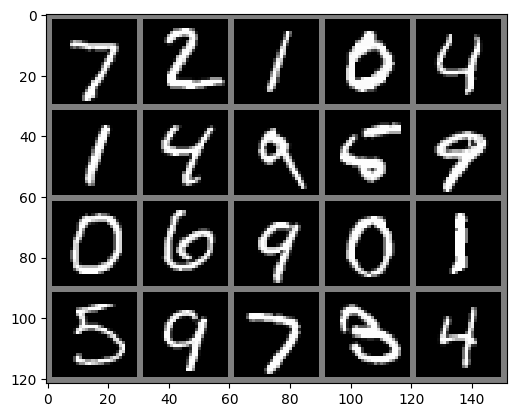

GroundTruth: 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4
Predicted: 7 2 1 0 4 1 4 9 4 7 0 0 9 0 1 3 9 7 6 4


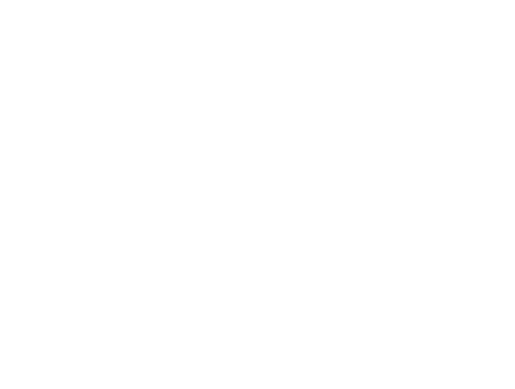

In [4]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


train_loader = DataLoader(train_dataset, batch_size=600, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=600, shuffle=False)

def sigmoid(z):
    return 1. / (1. + np.exp(-z))

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# One-hot encode the labels
def one_hot_encode(labels, num_classes=10):
    return torch.eye(num_classes)[labels]

# Plot loss and accuracy
losses = []
accuracies = []
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        labels_one_hot = one_hot_encode(labels, num_classes=10).to(inputs.device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels_one_hot)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    losses.append(running_loss / len(train_loader))
    accuracies.append(100 * correct / total)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {losses[-1]}, Accuracy: {accuracies[-1]:.2f}%")

# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), losses, marker='o', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies, marker='o', label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

classes = tuple(str(i) for i in range(10))  # MNIST class labels (digits 0-9)
test_and_visualize(model, test_loader, classes, 'MNIST')

## Zadanie 5.2*

Wykorzystując moduł `torch.nn`, zbudować od podstaw prostą sieć MLP dla dowolnie wybranego zadania klasyfikacji (np. na podstawie danych z biblioteki `torchvision.datasets`).

Epoch 1/5, Loss: 2.0342036782933013
Epoch 2/5, Loss: 1.7601118670095264
Epoch 3/5, Loss: 1.6462108672732283
Epoch 4/5, Loss: 1.5737809069321285
Epoch 5/5, Loss: 1.5168821647039155


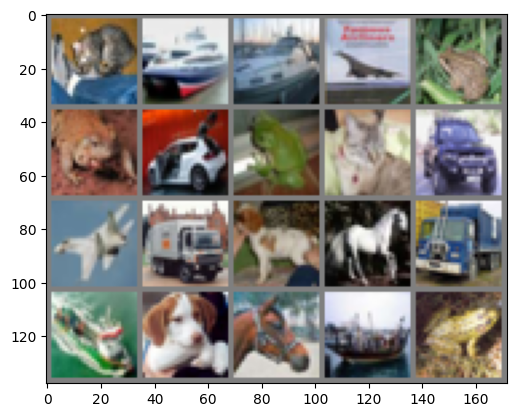

GroundTruth: cat ship ship plane frog frog car frog cat car plane truck dog horse truck ship dog horse ship frog
Predicted: cat truck ship ship deer frog cat frog dog car ship truck car horse truck ship dog truck ship frog


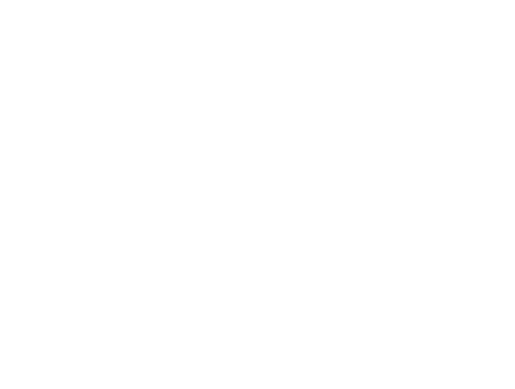

In [ ]:
cifar_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
cifar_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=cifar_transform)
cifar_test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=cifar_transform)

cifar_train_loader = DataLoader(cifar_train_dataset, batch_size=64, shuffle=True)
cifar_test_loader = DataLoader(cifar_test_dataset, batch_size=64, shuffle=False)

class CIFAR_MLP(nn.Module):
    def __init__(self):
        super(CIFAR_MLP, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

cifar_model = CIFAR_MLP()
cifar_criterion = nn.CrossEntropyLoss()
cifar_optimizer = optim.SGD(cifar_model.parameters(), lr=0.01)

num_epochs = 5
for epoch in range(num_epochs):
    cifar_model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in cifar_train_loader:
        cifar_optimizer.zero_grad()

        outputs = cifar_model(inputs)
        loss = cifar_criterion(outputs, labels)

        loss.backward()
        cifar_optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(cifar_train_loader)}")



classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

test_and_visualize(cifar_model, cifar_test_loader, classes, 'CIFAR')